In this notebook I test a previously-trained (non-bayesian) convolution neural net.

In [14]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
def load_mnist(
    root="../data/", train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None, download=True):
    data = torchvision.datasets.MNIST(
        root=root,
        train=train,
        transform=transform,
        target_transform=target_transform,
        download=download
    )
    return torch.utils.data.DataLoader(data, batch_size=4)

In [3]:
test_set = load_mnist(train=False)

Recall the convolutional neural net

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # (28*28)
        self.conv1 = nn.Conv2d(1, 6, 5)
        # (6@ 24*24): 28-5+1 = 24
        self.pool = nn.MaxPool2d(2, 2)
        # (6@ 12*12)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # (16@ 8*8): 12-5+1 = 8
        # (16@ 4*4)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Load the trained model

In [6]:
net = Net()
net.load_state_dict(torch.load("../models/mnist-cnn.pth"))

<All keys matched successfully>

Run on the test dataset

In [8]:
dataiter = iter(test_set)
images, labels = dataiter.next()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

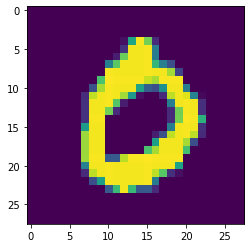

In [20]:
plt.imshow(images[3][0])

In [13]:
labels

tensor([7, 2, 1, 0])

In [12]:
predicted

tensor([7, 2, 1, 0])